In [0]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
forex_data = pd.read_csv('INRUSD.csv')
forex_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,20-05-2015,63.780998,63.873001,63.400002,63.785000,63.785000,0
1,21-05-2015,63.624001,63.743000,63.502998,63.625000,63.625000,0
2,22-05-2015,63.630001,63.673000,63.389999,63.625999,63.625999,0
3,25-05-2015,63.483002,63.660000,63.470001,63.483002,63.483002,0
4,26-05-2015,63.606998,64.013000,63.470001,63.570999,63.570999,0


In [0]:
X = forex_data.iloc[:500, 4]
X

0      63.785000
1      63.625000
2      63.625999
3      63.483002
4      63.570999
         ...    
495    64.629997
496    64.500000
497    64.449997
498    64.453697
499    64.408302
Name: Close, Length: 500, dtype: float64

In [0]:
y = forex_data.iloc[:500, 0]
y

0      20-05-2015
1      21-05-2015
2      22-05-2015
3      25-05-2015
4      26-05-2015
          ...    
495    12-04-2017
496    13-04-2017
497    14-04-2017
498    17-04-2017
499    18-04-2017
Name: Date, Length: 500, dtype: object

Visualisation

In [0]:
forex_data

,Date,Open,High,Low,Close,Adj Close,Volume
0,20-05-2015,63.780998,63.873001,63.400002,63.785000,63.785000,0
1,21-05-2015,63.624001,63.743000,63.502998,63.625000,63.625000,0
2,22-05-2015,63.630001,63.673000,63.389999,63.625999,63.625999,0
3,25-05-2015,63.483002,63.660000,63.470001,63.483002,63.483002,0
4,26-05-2015,63.606998,64.013000,63.470001,63.570999,63.570999,0
...,...,...,...,...,...,...,...
1298,14-05-2020,75.427200,75.730003,75.341003,75.426201,75.426201,0
1299,15-05-2020,75.485001,76.185501,75.319298,75.485001,75.485001,0
1300,18-05-2020,75.820000,76.092003,75.612396,75.820000,75.820000,0
1301,19-05-2020,75.599998,76.040001,75.527496,75.600098,75.600098,0


In [0]:
type(X)

pandas.core.series.Series

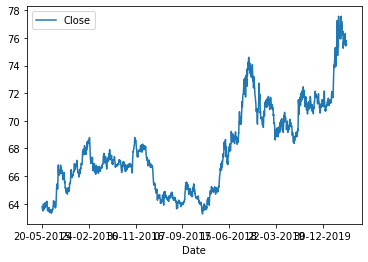

In [0]:
forex_data.plot.line(x="Date",y="Close")

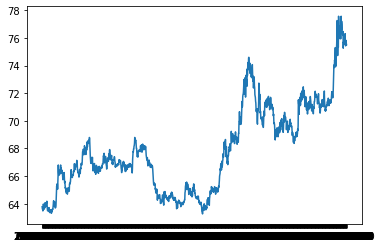

In [0]:
plt.plot(forex_data.Date, forex_data.Close)
plt.show()

In [0]:
forex_data.Close.isna().sum()

0

finding SMA

In [0]:
rolling_mean = forex_data.Close.rolling(window=200).mean()
rolling_mean2 = forex_data.Close.rolling(window=50).mean()

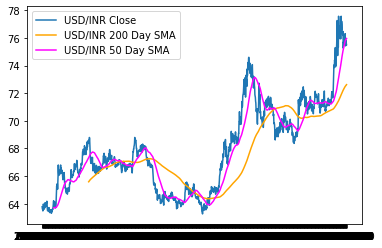

In [0]:
plt.plot(forex_data.Date, forex_data.Close, label='USD/INR Close')
plt.plot(forex_data.Date, rolling_mean, label='USD/INR 200 Day SMA', color='orange')
plt.plot(forex_data.Date, rolling_mean2, label='USD/INR 50 Day SMA', color='magenta')
plt.legend(loc='upper left')
plt.show()

In [0]:
rolling_mean.isna().sum()
rolling_mean.shape

(1303,)

In [0]:
buy_rate = 0
sell_rate = 0
target = 0
stoploss = 0
currRate = 0
isBought = 0
isSold = 1
totalProfit = 0
print(rolling_mean[200])
print(rolling_mean[198])

65.61517512999998
nan


In [0]:
for i in range(250,1302):
  currRate = forex_data.Close[i]
  if(isSold==1):
    if(rolling_mean2[i]>rolling_mean[i]):
      isSold = 0
      isBought = 1
      print("Buy")
      
      stoploss = (rolling_mean2[i]+rolling_mean2[i-1]+rolling_mean2[i-2])/3
      target = currRate+(currRate-stoploss)*2
      print("target",target)
      buy_rate=currRate
      print("Buy rate",buy_rate)
  elif(isBought==1):
    if(currRate<=stoploss or currRate>=target):
      print("sell at",currRate)
      sell_rate= currRate
      isBought = 0
      isSold = 1
      print((sell_rate-buy_rate))
      totalProfit=totalProfit+(sell_rate-buy_rate)
   

Buy
target 66.0165688266668
Buy rate 66.592003
sell at 66.620003
0.027999999999991587
Buy
target 66.20564382666679
Buy rate 66.601997
sell at 66.594002
-0.00799499999999398
Buy
target 66.72152248000012
Buy rate 66.721001
sell at 66.666
-0.055001000000004296
Buy
target 66.43935520000011
Buy rate 66.591003
sell at 66.750999
0.15999599999999248
Buy
target 67.41285876000009
Buy rate 66.900002
sell at 67.476997
0.5769949999999966
Buy
target 69.00239033333342
Buy rate 67.422997
sell at 66.510002
-0.9129949999999951
Buy
target 66.75446957333338
Buy rate 66.740997
sell at 66.945
0.20400300000000016
Buy
target 67.94916904000007
Buy rate 67.153999
sell at 66.648003
-0.5059959999999961
Buy
target 65.85131638666662
Buy rate 66.750999
sell at 66.67600300000001
-0.07499599999998452
Buy
target 65.94049854666669
Buy rate 66.760002
sell at 66.841003
0.08100100000000054
Buy
target 66.19852950666667
Buy rate 66.834999
sell at 66.793999
-0.04099999999999682
Buy
target 66.06408376000002
Buy rate 66.782997


In [0]:
print(totalProfit*1000)

4378.638999999957
